## CASE STUDY:
## DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR  INSURANCE CLAIMS DATA


### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
import math

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and            combine the two datasets appropriately to create a 360-degree view of the          data. Use the same for the subsequent questions.


In [2]:
# Uploading datasets i.e claims_data & cust_data
claims_data = pd.read_csv("E:Datasets/claims.csv",sep=",")
cust_data = pd.read_csv("E:Datasets/cust_demographics.csv")

#### Data Audit check at each level

In [3]:
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [5]:
claims_data.shape

(1100, 10)

In [6]:
claims_data.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [7]:
claims_data = claims_data.dropna()

In [8]:
claims_data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [9]:
claims_data.shape

(1026, 10)

In [10]:
cust_data.shape

(1085, 6)

In [11]:
cust_data.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

#### Creating a 360-degree view of the data

#### Result

In [12]:
#Merging both Datasets and assigning it to a variable called final_data
final_data = pd.merge(left = cust_data,
         right = claims_data,
        left_on="CUST_ID",right_on= "customer_id",
        how="inner")
final_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1007,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1008,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1009,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


#### 2.   Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

#### Data Audit check at each level for final_data

In [13]:
final_data.shape

(1011, 16)

In [14]:
final_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [15]:
#Changing the datatypes of columns"DateOfBirth","claim_date" and changing the years above than 2020 in DOB
final_data["DateOfBirth"]=pd.to_datetime(final_data["DateOfBirth"],format = "%d-%b-%y")  #to datetime
final_data["claim_date"]=pd.to_datetime(final_data["claim_date"])    #to datetime
final_data.loc[(final_data.DateOfBirth.dt.year > 2020),"DateOfBirth"] = final_data[final_data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x:x-pd.DateOffset(years=100))


In [16]:
#Changing the datatype of contact from object to float
final_data["Contact"] = final_data.Contact.str.replace("-","")

#### Result

In [17]:
final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


#### 3.   Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [18]:
#Converting the column claim_amount to numeric and replacing $ sign 
final_data["claim_amount"] = pd.to_numeric(final_data.claim_amount.str.replace("$",""),downcast="float")

#### Result

In [19]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


#### 4.   Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [20]:
# Creating a new column called "Flag" which indicates police_report=="No" then 0 & police_report=="Yes" then 1 else NaN
final_data["flag"] = np.where(final_data.police_report=="No",0,np.where(final_data.police_report=="Yes",1,np.nan))

#### Result

In [21]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN


#### 5.   One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [22]:
#Dropping Duplicate customer_id to make it unique
final_data = final_data.drop_duplicates(subset=["CUST_ID"])

#### Result

In [23]:
final_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
6,19269962,Male,1977-05-13,NV,9568718691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0
1007,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0
1008,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0
1009,11256802,Female,1964-10-22,LA,4693455617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0


#### 6.   Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [24]:
#Chaecking missing columns in Datasets
final_data.isnull().sum()

CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
flag                   276
dtype: int64

In [25]:
#Creating new variables Cat_col and Con_Col i.e Categorical column & Continuos Columns 
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [26]:
# Imputing the missing values with an appropriate value. (mean for continuous and mode for categorical) with the help of For Loop
for col in cat_col:
    final_data[col] = final_data[col].fillna(final_data[col].mode()[0])
    final_data[con_col] = final_data[con_col].fillna(final_data[con_col].mean())
final_data

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yrp62\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
6,19269962,Male,1977-05-13,NV,9568718691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1.0
1007,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0.0
1008,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1.0
1009,11256802,Female,1964-10-22,LA,4693455617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0.0


#### Hence there are no missing values in either of columns i.e Continuous or Categorical

In [27]:
final_data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

#### 7.   Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##### Children                  < 18
##### Youth                      18-30
##### Adult                       30-60
##### Senior                     > 60


In [28]:
#Creating new variable called "now" and subtracting it from DateOfBirth column to form a new column Age of every customers
now = pd.Timestamp('now')
final_data["Age"] = (now - final_data['DateOfBirth']).astype('<m8[Y]')
final_data.head(2)

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,41.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,50.0


#### Using numpy.where performing the above tasks

In [29]:
#Creating a new Column Age_grp which gives Children : Age < 18 , Youth : Age(18-30) , Adult: Age(30-60) , Senior : Age > 60
final_data["Age_grp"] = np.where(final_data.Age<18,"Children", np.where(final_data.Age<30,"Youth",np.where(final_data.Age<=60,"Adult",np.where(final_data.Age>60,"Senior",np.nan))))

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Result

In [30]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,41.0,Adult
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,50.0,Adult


#### 8.   What is the average amount claimed by the customers from various segments?

In [31]:
#Grouping the data based on Customers and Segments to find the average claim amount by customers
final_data.groupby(["CUST_ID","Segment"])[["claim_amount"]].mean()

,,claim_amount
CUST_ID,Segment,
263204,Silver,39192.0
287476,Silver,1621.5
441097,Gold,37040.0
524545,Gold,35250.0
608461,Platinum,2630.0
...,...,...
99674324,Silver,21480.0
99723844,Gold,14360.0
99761663,Silver,1242.0


#### 9.   What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [32]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,41.0,Adult
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,50.0,Adult


In [33]:
#Grouping the data based on Incident_cause and finding the total claim_amount 
total_claim = final_data.loc[final_data.claim_date <"2018-10-01",:].groupby(["claim_date","incident_cause"])[["claim_amount"]].sum()

#### Result

In [34]:
#Sorting the data 20 days prior to 1st october using claim_date

total_claim.sort_values(by=["claim_date"],ascending = False).head(20)

claim_amount
claim_date incident_cause                  
2018-09-26 Other driver error        2440.0
           Other causes             64192.0
           Crime                     2950.0
2018-09-19 Other driver error       42449.5
           Other causes             91302.0
           Natural causes            1150.0
           Crime                     3890.0
2018-09-12 Other causes             75122.0
           Natural causes            7268.0
           Driver error              2130.0
           Other driver error        2710.0
2018-09-06 Other driver error       37080.0
           Other causes             52680.0
           Natural causes           28761.5
           Driver error             24731.0
           Crime                     1910.0
2018-08-30 Other driver error        5476.0
           Natural causes            2162.0
           Driver error             51680.5
           Crime                     4210.0

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [35]:
#No. of Adults from TX, DE and AK claimed insurance for driver related issues and causes
driver_issues = final_data.loc[(final_data.incident_cause.str.lower().str.contains("driver")&((final_data.State=="TX")|(final_data.State=="AK")|(final_data.State=="DE"))&(final_data.Age_grp=="Adult")),:].groupby(by=["State","Age_grp"])[["State"]].count()

#### Result

In [36]:
driver_issues

,,State
State,Age_grp,
AK,Adult,6
DE,Adult,10
TX,Adult,8


#### 11.  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [37]:
#Grouping the data based on gender and segment to find the total claim amount
Gender_claims = final_data.pivot_table(index="gender",columns="Segment",values="claim_amount")
Gender_claims

Segment,Gold,Platinum,Silver
gender,,,
Female,12188.043945,12384.239258,11576.280273
Male,13036.869141,12475.322266,12920.410156


#### Result

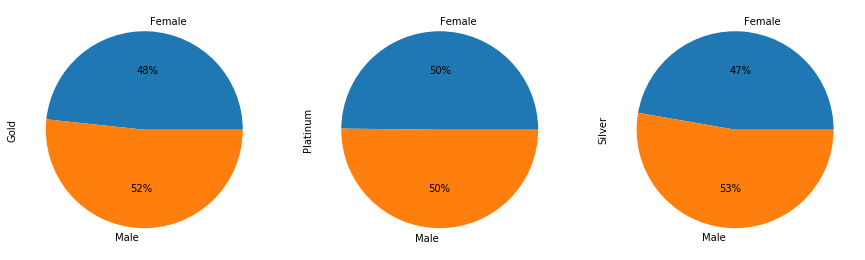

In [38]:
#Pie chart representing the claim amount as a percentage for female and male for every segment
Gender_claims.plot(kind="pie",autopct="%1.0f%%",subplots=True,legend =False,figsize=(15,8))
plt.show()

#### 12.  Among males and females, which gender had claimed the most for anytype of driver related issues? E.g. This metric can be compared using a bar chart


In [39]:
#Grouping the data based on gender had claimed the most for anytype of driver related issues
Gender_claims_driver = final_data.loc[(final_data.incident_cause.str.lower().str.contains("driver"))].groupby(["gender","incident_cause"])[["gender"]].count().add_prefix("CountOf_").reset_index()
Gender_claims_driver

,gender,incident_cause,CountOf_gender
0,Female,Driver error,67
1,Female,Other driver error,137
2,Male,Driver error,172
3,Male,Other driver error,89


#### Result

#### Bar graph using seaborn

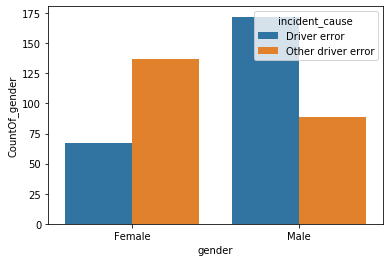

In [40]:
sns.barplot(x="gender",y="CountOf_gender",data=Gender_claims_driver,hue="incident_cause")
plt.show()

In [41]:
print("By seeing Bar graph we can now compare and say that males are having more Driver error than females and females are having more other driver error than males")

By seeing Bar graph we can now compare and say that males are having more Driver error than females and females are having more other driver error than males


#### 13.  Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [42]:
#Grouping the data based on age group had the maximum fraudulent policy claims
f_claims = final_data.groupby("Age_grp")[["fraudulent"]].count().reset_index()
f_claims

,Age_grp,fraudulent
0,Adult,769
1,Youth,235


#### Bar graph using seaborn

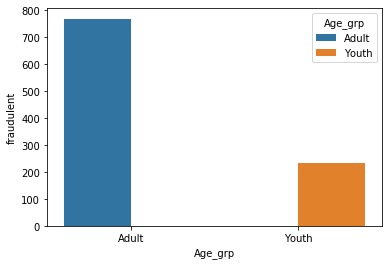

In [43]:
sns.barplot(x="Age_grp",y="fraudulent",data=f_claims,hue = "Age_grp")
plt.show()

In [44]:
print("By seeing above bar graph we can conclude that maximum fraudulent claims done by age group is none other than Adults")

By seeing above bar graph we can conclude that maximum fraudulent claims done by age group is none other than Adults


#### 14.  Visualize the monthly trend of the total amount that has been claimed by the customers. 
#### Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [45]:
final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,41.0,Adult
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,50.0,Adult
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,36.0,Adult
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0,34.0,Adult
6,19269962,Male,1977-05-13,NV,9568718691,Gold,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0.0,43.0,Adult


In [46]:
#Creating a new column Monthly which include months oof claim date and an index variable for setting months in chronological order
final_data["Monthly"] = final_data["claim_date"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))
index = {"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Result in chronological order

In [47]:
#Grouping data based on Monthly and taking sum of claim amount, for setting all months in chronological order using reindex(index) 
Monthly_trend = final_data.groupby("Monthly")[["claim_amount"]].sum().reindex(index)
Monthly_trend

,claim_amount
Monthly,
January,1243588.5
February,1064645.0
March,1237921.5
April,1248750.5
May,1014447.5
June,1201510.0
July,1266800.5
August,833982.0
September,812723.0


#### 15.  What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [48]:
#Grouping Datasets based on Gender and Age group to get the average amount claimed by customers.
Avg_claim = final_data.groupby(["gender","Age_grp","fraudulent"])[["claim_amount"]].mean().reset_index()
Avg_claim

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,12255.053711
1,Female,Adult,Yes,11683.879883
2,Female,Youth,No,12905.416992
3,Female,Youth,Yes,7439.924805
4,Male,Adult,No,12074.224609
5,Male,Adult,Yes,16067.567383
6,Male,Youth,No,12332.021484
7,Male,Youth,Yes,12193.219727


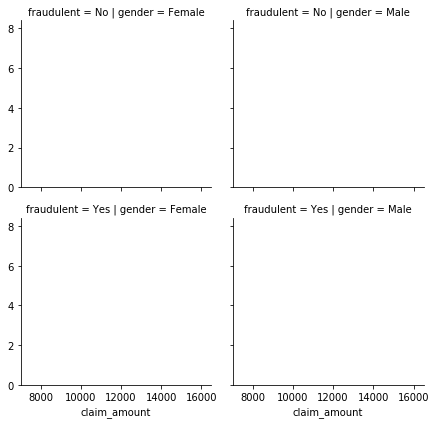

In [49]:
# creates the FaceGrid
g = sns.FacetGrid(Avg_claim,col="gender",row="fraudulent")
# map over a make a barplot
g = g.map(plt.bar,"claim_amount",height=(8,5))

# adds legend
g.add_legend();


#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis
#### testing steps, conclusion from the p-values and the business implications of the statements.


#### 16.  Is there any similarity in the amount claimed by males and females?

In [50]:
#Extracting amounts claimed by males and females
claim_male = final_data["claim_amount"].loc[final_data["gender"]=="Male"]
claim_female = final_data["claim_amount"].loc[final_data["gender"]=="Female"]

#### Mean of claim_male & claim_female

In [51]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

The average amount claimed by males is 12822.982421875


In [52]:
print("The average amount claimed by Females is {}".format(claim_female.mean()))

The average amount claimed by Females is 12075.1337890625


### Two Sample t-test (Independent)

In [53]:
#Unequal Variance i.e equal_var = False
Unequal_variance = stats.ttest_ind(a=claim_male,
                b=claim_female,
                equal_var=False)
Unequal_variance

Ttest_indResult(statistic=0.8604422707167197, pvalue=0.38975112352089336)

In [54]:
#Equal Variance i.e equal_var = True
Equal_variance = stats.ttest_ind(a=claim_male,
                                 b=claim_female,
                                 equal_var=True)
Equal_variance

Ttest_indResult(statistic=0.8598772044326245, pvalue=0.3900624156831122)

#### We will consider Equal_variance since T-score (statistic) is not having huge difference between both the tests


In [55]:
Unequal_variance.statistic - Equal_variance.statistic

0.0005650662840952503

In [56]:
p = Equal_variance.pvalue
t = Equal_variance.statistic

print("For the above test, the t-score is {} and the p-value is {}".format(t,p))

if (p<0.05):
    print("We reject Null hypothesis")
else:
        print("We Fail to reject Null hypothesis")

For the above test, the t-score is 0.8598772044326245 and the p-value is 0.3900624156831122
We Fail to reject Null hypothesis


- Since the p-value(significance value) of the test is greater than 0.05, we can conclude that there is a similarity between amount claimed by Males and Females

#### 17.  Is there any relationship between age category and segment?

In [57]:
final_data[["Age_grp"]].head()

,Age_grp
0,Adult
1,Adult
2,Adult
4,Adult
6,Adult


In [58]:
final_data[["Segment"]].head()

,Segment
0,Platinum
1,Silver
2,Silver
4,Silver
6,Gold


### Chi-Square Test

In [59]:
Agegrp_Seg_xtab = pd.crosstab(final_data.Age_grp, final_data.Segment, margins= True)
Agegrp_Seg_xtab

Segment,Gold,Platinum,Silver,All
Age_grp,,,,
Adult,269,258,242,769
Youth,74,86,75,235
All,343,344,317,1004


In [68]:
x2test_17 = stats.chi2_contingency(observed = Agegrp_Seg_xtab)
x2test_17

(1.1407651662174991,
 0.9797093816472,
 6,
 array([[ 262.71613546,  263.48207171,  242.80179283,  769.        ],
        [  80.28386454,   80.51792829,   74.19820717,  235.        ],
        [ 343.        ,  344.        ,  317.        , 1004.        ]]))

#### x2test_17[0] = Chi-Square score,  x2test_17[1] = p-value,  x2test_17[2] = degrees of freedom, x2test_17[3] = Expected value

In [70]:
print("The Chi-Square score is {} and the p-value is {}".format(x2test_17[0],x2test_17[1]))

The Chi-Square score is 1.1407651662174991 and the p-value is 0.9797093816472


In [72]:
x2test_17[1] > 0.05

True

- Since the significance value(p-value) in the test is greater than 0.05 & the observed value is equal to expected value we fail to reject Null hypothesis.Therefore there is no relationship between age category and segment

#### 18.  The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [119]:
Claim_amount_current = final_data.loc[final_data.claim_date.dt.year == 2018].claim_amount
Claim_amount_current

1        2980.0
2        3369.5
4        1680.0
6        2680.0
10       1730.0
         ...   
999      2730.0
1000    33330.0
1001     2780.0
1003     2290.0
1006     1770.0
Name: claim_amount, Length: 443, dtype: float32

In [121]:
Claim_amount_current.mean()

12673.5849609375

In [123]:
Claim_amount_current.std()

13963.1943359375

### One-Sample T-test

In [124]:
ttest_1 = stats.ttest_1samp(a=Claim_amount_current, popmean = 10000)
t_score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue


In [127]:
print("For the above test, the t-score is {} and the p-value is {}".format(t_score,p_value))

if (p_value < 0.05):
    print("We reject Null hypothesis")
else:
        print("We Fail to reject Null hypothesis")

For the above test, the t-score is 4.03 and the p-value is 6.565606062452039e-05
We reject Null hypothesis


- Since the significance value(p-value) in the test is smaller than 0.05 we reject Null(H0) hypothesis. Therefore we can now conclude that yes there is a significant rise in claim amounts in current year.


#### 19. Is there any difference between age groups and insurance claims?

### F-Test / ANOVA

In [133]:
age_group_1 = final_data["total_policy_claims"].loc[final_data["Age_grp"]=="Youth"]
age_group_2 = final_data["total_policy_claims"].loc[final_data["Age_grp"]=="Adult"]

In [138]:
#Performing Anova test
anova = stats.f_oneway(age_group_1,age_group_2)

#Statistic : F Value
f = anova.statistic

# P-value
p = anova.pvalue

In [139]:
print("The f-value from above test is {} and the p-value is {}".format(f,p))
if (p<0.05):
    print("We reject Null(H0) hypothesis")
else:
    print("We fail to reject Null(H0) hypothesis")

The f-value from above test is 1.3270519428108258 and the p-value is 0.24960513527791883
We fail to reject Null(H0) hypothesis


- Since the significance value(p-value) of the is greater than 0.05, we fail to reject Null hypothesis.Therefore we can conclude that there is no difference between Age groups and Insurance Claims Or No influence of Age groups on Insurance claims.

#### 20. Is there any relationship between total number of policy claims and the claimed amount?


### Correlation

In [141]:
final_data.total_policy_claims.corr(other=final_data.claim_amount)

-0.014822956274526448

- Hence totalnumber of policy claims is inversely proportional to the claimed amount

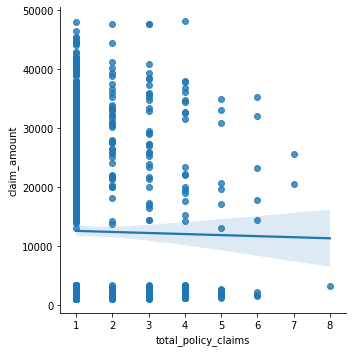

In [144]:
# Visualizing using scatter plot
sns.lmplot(x="total_policy_claims",y="claim_amount",data = final_data)
plt.show()

- Since the value from correlation function between total policy claims and claimed amount is negative we can conclude from looking to scatter plot that there is no relationship between both the categories